**Assignment 2 | Authors: Bakhbyergyen, Edina, Ina, Paul**

## **Enter the Matrix of Jayhawks [15 points]**

Download the image of a Kansas Jayhawks logo here: https://bit.ly/3PjTRP0, and store it in a local
folder of your Google drive. Load in the image as an numpy array, which can then be displayed as follows:


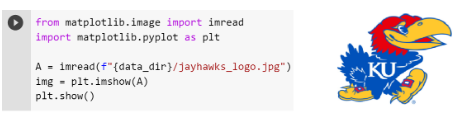

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


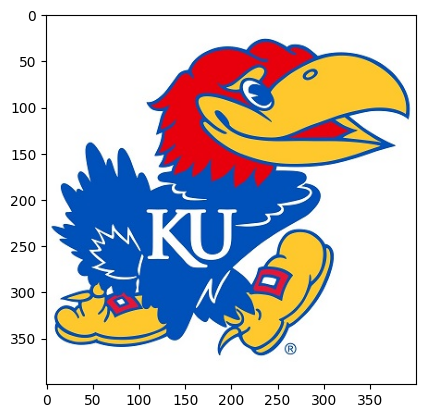

In [ ]:
import os
from matplotlib.image import imread
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive'

A = imread(f"{data_dir}/jayhawks_logo.jpg")
img = plt.imshow(A)
plt.show()

**Histograms of Pixel Values.** The Jayhawks logo is a colored image with 400×400 pixels and 3 color
channels (Red, Green, Blue).

1. Plot a histogram of the pixel values for each of the color channels. Put all histograms in the same
figure and use 10 bins for each histogram. (Remember: label your figure properly)

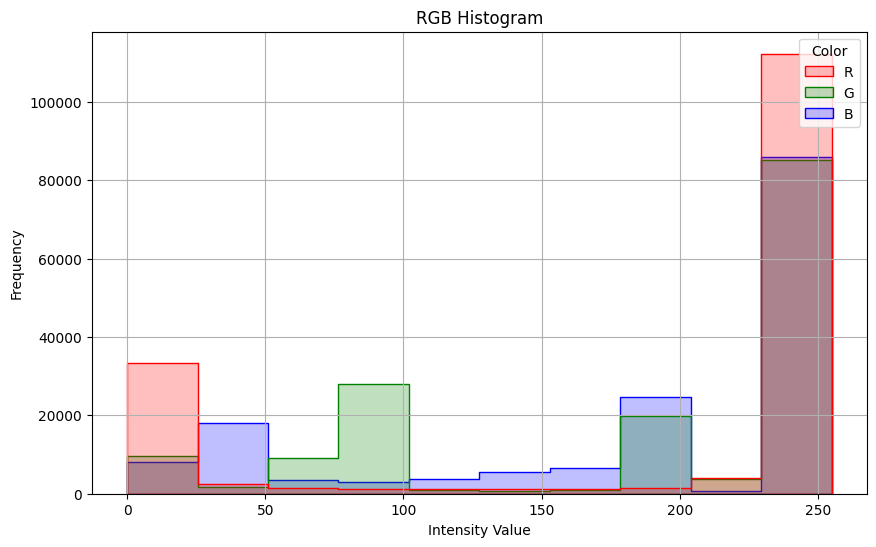

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

R = A[:,:,0].ravel() # red
G = A[:,:,1].ravel() # green
B = A[:,:,2].ravel() # blue

data = pd.DataFrame({'R': R, 'G': G, 'B': B})

data_melted = data.melt(var_name='Color', value_name='Intensity')

palette = {'R':'red', 'G':'green','B':'blue'}

plt.figure(figsize=(10, 6))
sns.histplot(data=data_melted, x='Intensity', hue='Color', bins=10, palette=palette, element='step', common_norm=False, kde=False)
plt.title('RGB Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Basic Image Manipulation.** By manipulating directly the original numpy array, create new images that
achieve the following effects and display the resulting images. (Note: you are NOT allowed to call existing
image/vision libraries such as opencv )

2. Flip the original image horizontally (i.e., mirror image).

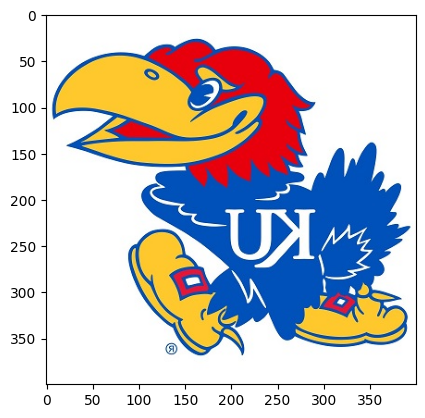

In [ ]:
A_flipped = np.fliplr(A)
img = plt.imshow(A_flipped)
plt.show()

3. Rotate the original image 90◦ counterclock-wise.

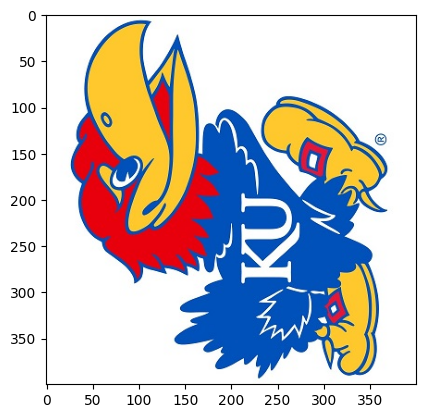

In [ ]:
A_90ccw = np.rot90(A)
img = plt.imshow(A_90ccw)
plt.show()

4. Crop the original image to show only the word “KU”.

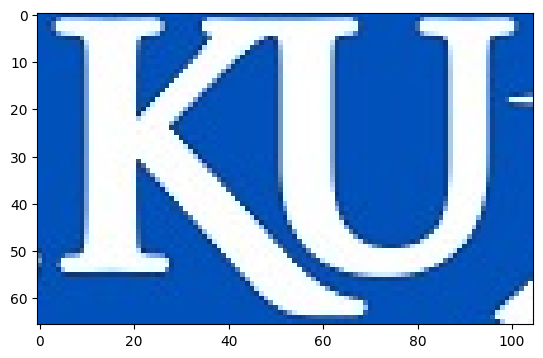

In [ ]:
A_cropped = A[210:276, 105:210]
img = plt.imshow(A_cropped)
plt.show()

5. Swap the red and blue color channels of the original image.

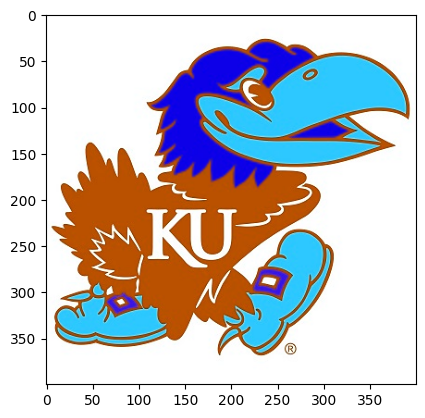

In [ ]:
A_swapped = A[:, :, ::-1]
img = plt.imshow(A_swapped)
plt.show()

**Convolution and Pooling**. Various visual effects can be achieved by convolving an input image with a
filter (or kernel). Figure 1(a) illustrates the 2D convolution of an image with a 3×3 filter. **Manually implement** the convolution operation, apply your implementation to the convolution of the original Jayhawks
image with the following filters, and display the resulting images. (Hint: The same convolution is to be
applied to each each color channel of the image)

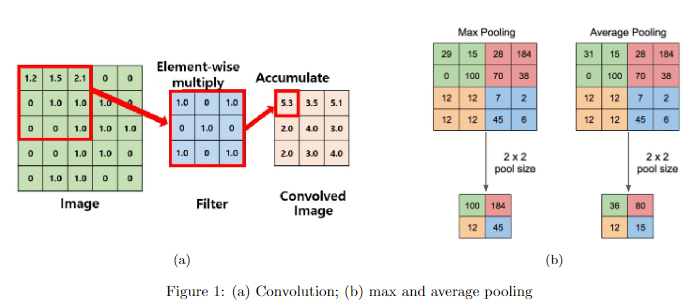

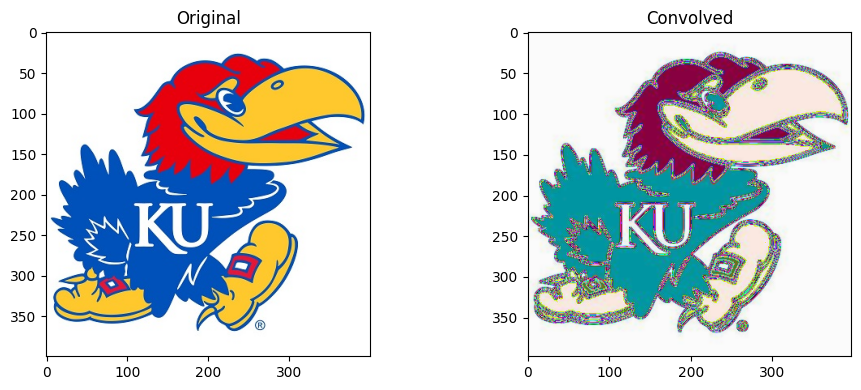

In [ ]:
def convolution(image, kernel):
    """
    Perform a convolution between an image and a kernel.
    """
    # Shape of the image and the kernel
    i_height, i_width, channels = image.shape
    k_height, k_width = kernel.shape

    # Preparing the output array
    output = np.zeros((i_height - k_height + 1, i_width - k_width + 1, channels), dtype=np.uint8)

    # Performing the convolution
    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            for c in range(channels):
                output[i, j, c] = np.sum(image[i:i+k_height, j:j+k_width, c] * kernel)

    return output

# Elementwise Multiplication
elementwise_mul = np.array([
    [1, 0, 1],
    [0, 1, 0],
    [1, 0, 1]
])

A_convolved = convolution(A, elementwise_mul)

# Visualizing original and convolved images
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(A)
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(A_convolved)
plt.title('Convolved')

plt.tight_layout()
plt.show()


6. A Gaussian blur filter (5 × 5):

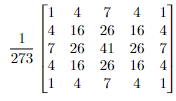

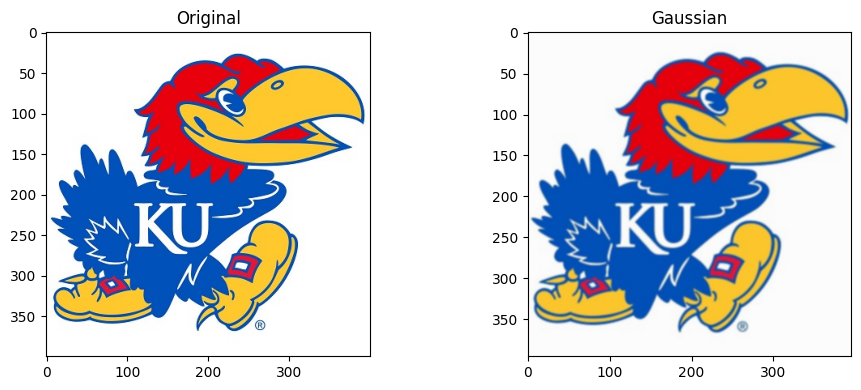

In [ ]:
# Gaussian blur filter

gaussian_blur = np.array([
    [1, 4, 7, 4, 1],
    [1, 16, 26, 16, 4],
    [7, 26, 41, 26, 7],
    [4, 16, 26, 16, 4],
    [1, 4, 7, 4, 1]
])

scalar = 1/273
gaussian_blur = np.multiply(gaussian_blur, scalar)

A_gaussian = convolution(A, gaussian_blur)

# Visualizing original and convolved images
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(A)
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(A_gaussian)
plt.title('Gaussian')

plt.tight_layout()
plt.show()

7. An edge detection filter (3 × 3)

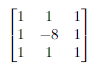

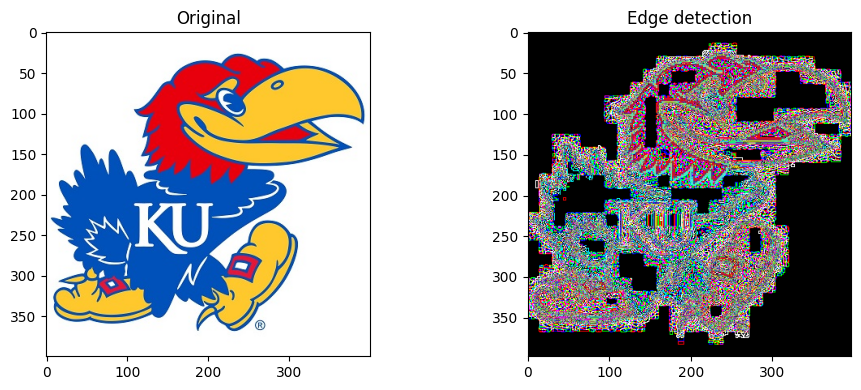

In [ ]:
# Edge detection filter

edge_detection = np.array([
    [1, 1, 1],
    [1, -8, 1],
    [1, 1, 1]
])

A_edge = convolution(A, edge_detection)

# Visualizing original and convolved images
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(A)
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(A_edge)
plt.title('Edge detection')

plt.tight_layout()
plt.show()

Pooling is an operation that can be used to down-sample an image. Figure 1(b) illustrates two types of
pooling operations (i.e., max pooling and average pooling) using a 2×2 pool size.

8. Manually implement both max pooling and average pooling, apply your implementation to the
down-sampling of the original Jayhawks image to 100×100 pixels, and display the down-sampled
images. (Hint: the same down-sampling is to be applied to each color channel of the image)

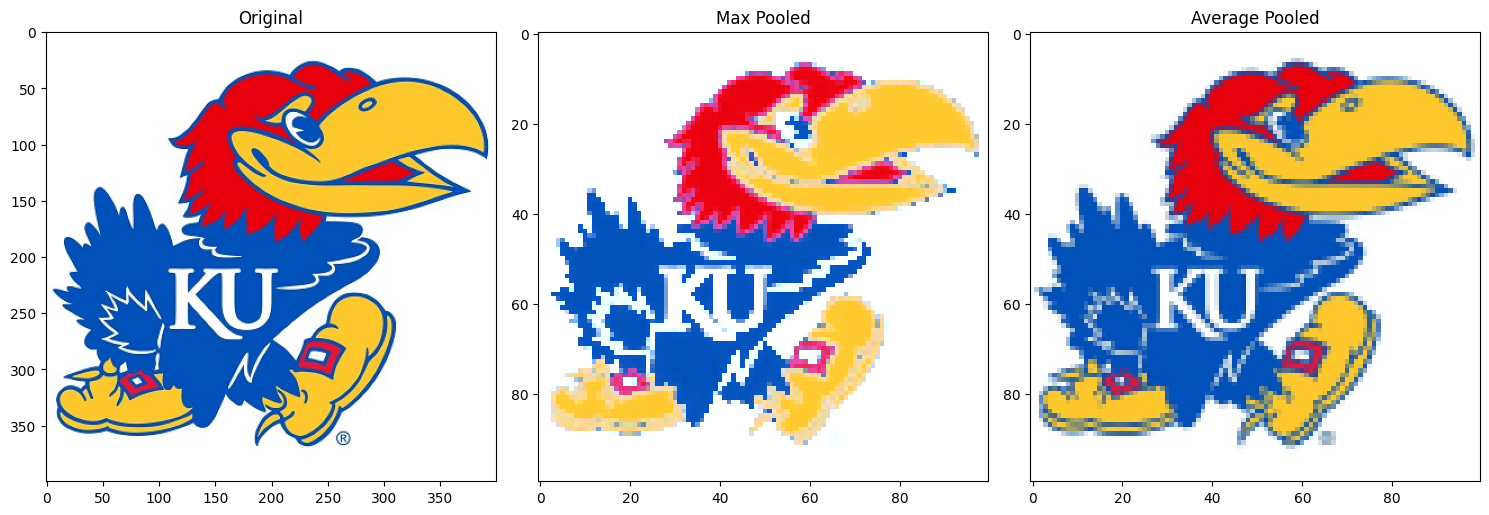

In [ ]:

def pool(image, mode='', pool_size=(2, 2)):
    """
    Perform pooling on the input image.
    """
    # Shape of the image
    i_height, i_width, channels = image.shape

    # Size of the pooling operation
    p_height, p_width = pool_size

    # Preparing the output array
    output = np.zeros((i_height//p_height, i_width//p_width, channels), dtype=np.uint8)

    # Performing the pooling
    for i in range(0, i_height, p_height):
        for j in range(0, i_width, p_width):
            for c in range(channels):
                if mode == 'max':
                    output[i//p_height, j//p_width, c] = np.max(image[i:i+p_height, j:j+p_width, c])
                elif mode == 'average':
                    output[i//p_height, j//p_width, c] = np.mean(image[i:i+p_height, j:j+p_width, c])

    return output

A_pooled_max = pool(A, mode='max', pool_size=(4, 4))
A_pooled_avg = pool(A, mode='average', pool_size=(4, 4))

# Visualizing original and pooled images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(A)
plt.title('Original')

plt.subplot(1, 3, 2)
plt.imshow(A_pooled_max)
plt.title('Max Pooled')

plt.subplot(1, 3, 3)
plt.imshow(A_pooled_avg)
plt.title('Average Pooled')

plt.tight_layout()
plt.show()


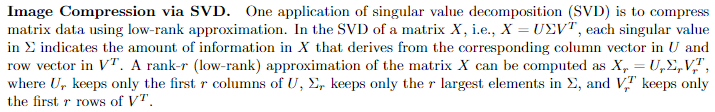

9. Compute the SVD for each color channel of the original Jayhawks image, and use line plots (with
log-scale for the y-axis) to show their singular values in descending order.

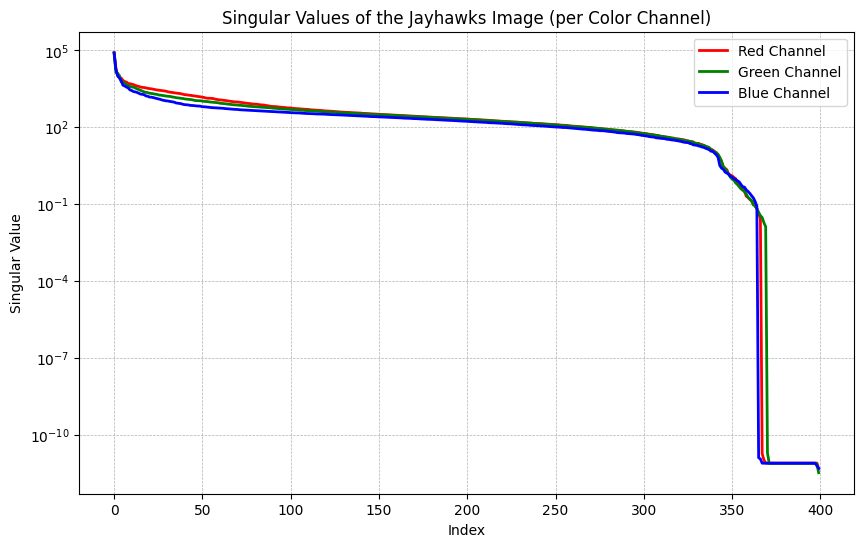

In [ ]:
# SVD for each channel

R = A[:, :, 0] # red
G = A[:, :, 1] # green
B = A[:, :, 2] # blue

U_R, S_R, Vt_R = np.linalg.svd(R, full_matrices=False)
U_G, S_G, Vt_G = np.linalg.svd(G, full_matrices=False)
U_B, S_B, Vt_B = np.linalg.svd(B, full_matrices=False)

plt.figure(figsize=(10, 6))

plt.semilogy(S_R, 'r-', linewidth=2, label='Red Channel')
plt.semilogy(S_G, 'g-', linewidth=2, label='Green Channel')
plt.semilogy(S_B, 'b-', linewidth=2, label='Blue Channel')

plt.title('Singular Values of the Jayhawks Image (per Color Channel)')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

10. Compute the rank-r approximations of the original image for r = 10, 50, 100, respectively, and display
the corresponding images. (Hint: The same approximation is to be applied to each color channel of the
image. If any pixel value in the approximated image falls outside of the range [0, 255], convert it to 0
(if < 0) or 255 (if > 255))

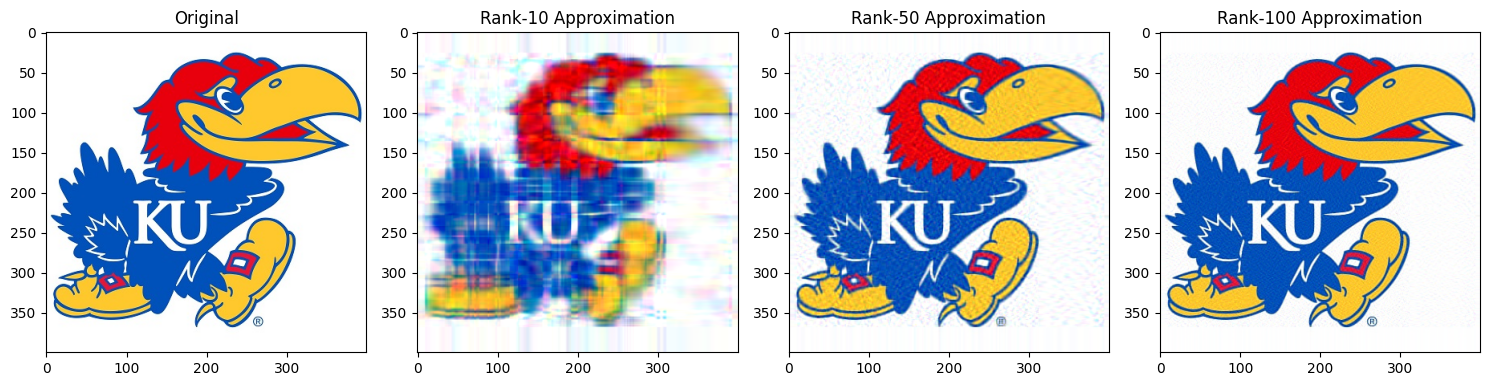

In [ ]:
def rank_r_approximation(U, S, Vt, r):
  U_r = U[:, :r]
  S_r = np.diag(S[:r])
  Vt_r = Vt[:r, :]
  A_r = np.dot(U_r, np.dot(S_r, Vt_r))
  return A_r

def cor_images(U, S, Vt, r):
  channels = []
  for i in range(len(U)):
    channel_approx = rank_r_approximation(U[i], S[i], Vt[i], r)
    channel_approx = np.clip(channel_approx, 0, 255)
    channels.append(channel_approx.astype(np.uint8))

  return np.stack(channels, axis=2)

R = A[:, :, 0]
G = A[:, :, 1]
B = A[:, :, 2]

U_R, S_R, Vt_R = np.linalg.svd(R, full_matrices=False)
U_G, S_G, Vt_G = np.linalg.svd(G, full_matrices=False)
U_B, S_B, Vt_B = np.linalg.svd(B, full_matrices=False)

ranks = [10, 50, 100]

plt.figure(figsize=(15, 5))
plt.subplot(1, len(ranks) + 1, 1)
plt.imshow(A)
plt.title('Original')

for i, r in enumerate(ranks):
    A_approx = cor_images([U_R, U_G, U_B], [S_R, S_G, S_B], [Vt_R, Vt_G, Vt_B], r)
    plt.subplot(1, len(ranks) + 1, i + 2)
    plt.imshow(A_approx)
    plt.title(f'Rank-{r} Approximation')

plt.tight_layout()
plt.show()

11. For each low-rank approximated image above, compute how much information (in percentage) of the
original image is retained. (Hint: The information retained is the average from that of the three color
channels)

In [ ]:
def information_retained(S,r):

  return (np.sum(S[:r]**2) / np.sum(S**2)) * 100

ranks = [10, 50, 100]

info_retained = []

for r in ranks:
  info_R = information_retained(S_R, r)
  info_G = information_retained(S_G, r)
  info_B = information_retained(S_B, r)

  info_avg = np.mean([info_R, info_G, info_B])
  info_retained.append(info_avg)

  print(f"Rank-{r} approximation retains {info_avg:.2f}% of information "
          f"(R: {info_R:.2f}%, G: {info_G:.2f}%, B: {info_B:.2f}%)")

Rank-10 approximation retains 96.97% of information (R: 95.12%, G: 97.15%, B: 98.64%)
Rank-50 approximation retains 99.45% of information (R: 99.22%, G: 99.43%, B: 99.71%)
Rank-100 approximation retains 99.84% of information (R: 99.81%, G: 99.82%, B: 99.88%)


## **Weibull Distribution [5 points]**
The Weibull distribution is a heavy-tail probability distribution often used to model variable failure rates
when analyzing the reliability of complex systems. Its probability density function (pdf) is given by:

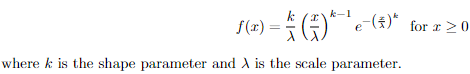



1. Plot the probability density functions (pdfs) of Weibull distributions with λ = 1, λ = 2 and λ = 4,
while fixing k = 2. Show the three pdfs in the same figure with proper legend.

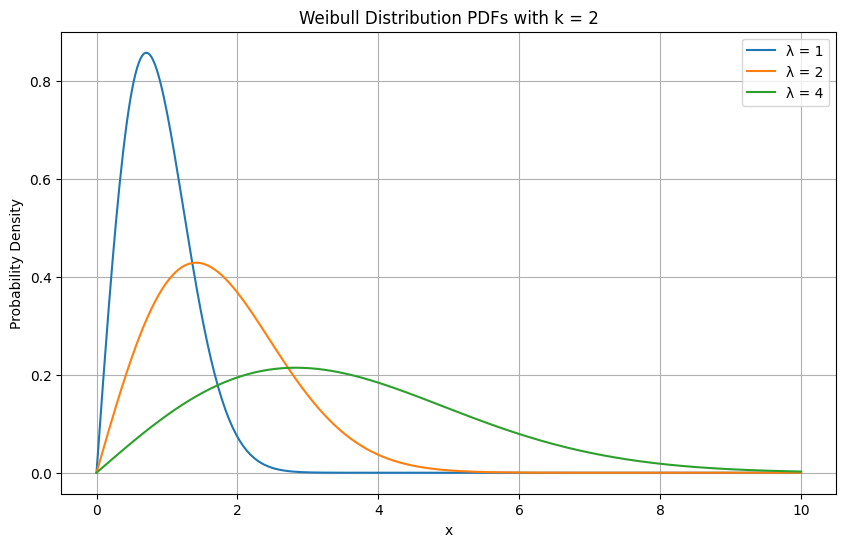

In [ ]:
def weibull_pdf(x, lambda_, k):
    """
    Compute the Weibull pdf for given x, lambda, and k.
    """
    return k / lambda_ * (x / lambda_)**(k - 1) * np.exp(- (x / lambda_)**k)

# Values for lambda
lambdas = [1, 2, 4]

# Values for x
x = np.linspace(0, 10, 400)

# k is fixed at 2
k = 2

# Plotting
plt.figure(figsize=(10, 6))

for lambda_ in lambdas:
    plt.plot(x, weibull_pdf(x, lambda_, k), label=f'λ = {lambda_}')

plt.title('Weibull Distribution PDFs with k = 2')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


2. Given a set of data {x1, x2, . . . , xn} sampled from a Weibull distribution with a known shape parameter k = 2, use maximum likelihood estimation (MLE) to derive an estimate of the scale parameter ˆλ.
Clearly show every step of your derivation.

**Please scroll to the end of this file for the solution** or access it via this link:

https://kansas-my.sharepoint.com/:b:/g/personal/b126y998_home_ku_edu/Ec3NrrE5obRImdNzImgDH08BzMcF-Z9DOXYEdRfgBe4tfA?e=P0AYrZ

3. Based on your derivation above, compute an estimated ˆλ using the data set in https://bit.ly/3Ppc9P7. Do the same for another data set in https://bit.ly/3PlHRfQ. Both data sets are generated from Weibull models with k = 2.

**Instructions for loading files**

To choose the data files to upload, click the button that appears beneath the next code block when you run the block.

In [ ]:
from google.colab import files
import io

# Define the MLE estimator formula
def estimate_lambda(data):
    n = len(data)
    return np.sqrt(np.sum(data**2) / (n))

# Load data from uploaded files in Google Colab
uploaded = files.upload()
weibull_data = pd.read_csv(io.BytesIO(uploaded['weibull_data.csv']))
weibull_data2 = pd.read_csv(io.BytesIO(uploaded['weibull_data2.csv']))

# Extracting the relevant column and estimating λ for each dataset
lambda_hat_1 = estimate_lambda(weibull_data['weibull sample'])
lambda_hat_2 = estimate_lambda(weibull_data2['weibull sample'])

print(f"Estimated λ for weibull_data: {lambda_hat_1:.4f}")
print(f"Estimated λ for weibull_data2: {lambda_hat_2:.4f}")


Saving weibull_data.csv to weibull_data.csv
Saving weibull_data2.csv to weibull_data2.csv
Estimated λ for weibull_data: 2.6856
Estimated λ for weibull_data2: 3.4376


4. Use two sample t-test with permutation resampling (with 1000 resamples) to test the hypothesis that
the two models (which generated the two data sets above) share the same parameter λ. Clearly
state your null hypothesis, alternative hypothesis, and the conclusion. Use one-tailed p-value with a
significance level of 5%.

**Please scroll to the end of this file for the solution** or access it via this link: https://kansas-my.sharepoint.com/:b:/g/personal/b126y998_home_ku_edu/EfW7NsfwM-1HrIYQDAtpJ9YB3Ked3lVn7-OxIm6LPGlmrw?e=r2TOyo

In [ ]:
# Given values

data_1 = weibull_data
data_2 = weibull_data2

lambda_hat_1 = np.sqrt(np.sum(data_1**2) / len(data_1))
lambda_hat_2 = np.sqrt(np.sum(data_2**2) / len(data_2))
t_obs = (lambda_hat_1 - lambda_hat_2) / np.sqrt(lambda_hat_1**2/len(data_1) + lambda_hat_2**2/len(data_2))
num_permutations = 1000

# Counter for the number of permuted t-statistics >= observed t-statistic
count_extreme_values = 0

# Permuting the datasets and calculating t-statistics
for _ in range(num_permutations):
    # Concatenate, shuffle, and split the data
    concatenated_data = np.concatenate((data_1, data_2))
    permuted_data = np.random.permutation(concatenated_data)
    perm_sample_1 = permuted_data[:len(data_1)]
    perm_sample_2 = permuted_data[len(data_1):]

    # Compute λ̂ for the permuted samples
    lambda_hat_perm_1 = np.sqrt(np.sum(perm_sample_1**2) / len(perm_sample_1))
    lambda_hat_perm_2 = np.sqrt(np.sum(perm_sample_2**2) / len(perm_sample_2))

    # Compute the t-statistic for the permuted samples
    t_perm = (lambda_hat_perm_1 - lambda_hat_perm_2) / np.sqrt(lambda_hat_perm_1**2/len(perm_sample_1) + lambda_hat_perm_2**2/len(perm_sample_2))

    t_obs_value = t_obs['weibull sample']

    # Check if the permuted t is >= the observed t
    if t_perm >= t_obs_value:
        count_extreme_values += 1

# Calculating the p-value
p_value = count_extreme_values / num_permutations

(count_extreme_values, p_value)


(998, 0.998)

## Appendix

Images of the linked-to files for Part 5, Question 2 and 4:


### MLE for Weibull Distribution:
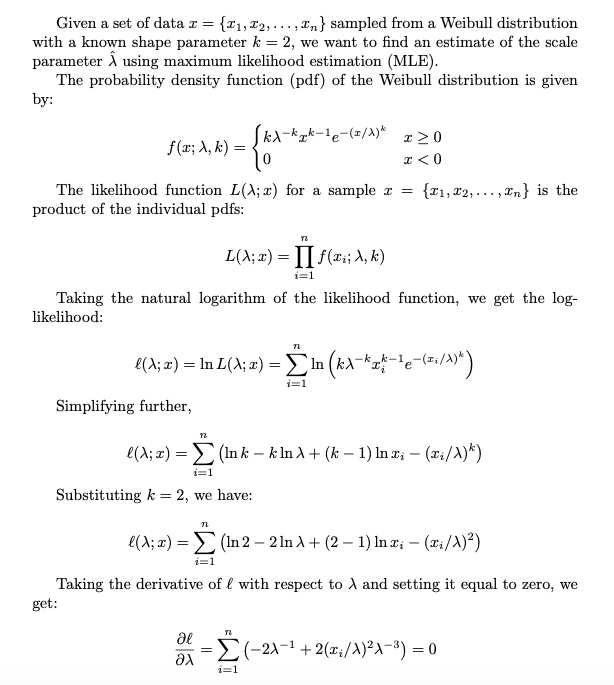


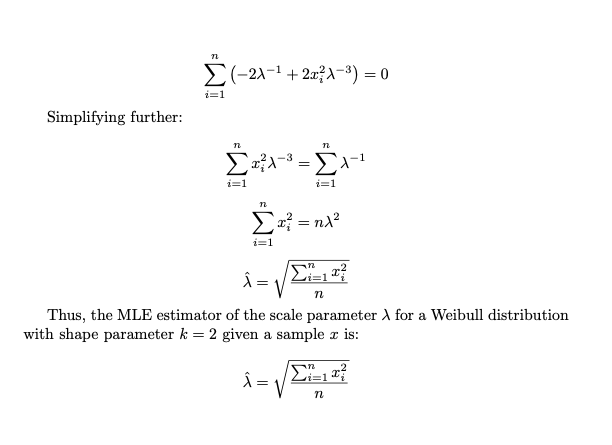

### Question 4, Hypotheses



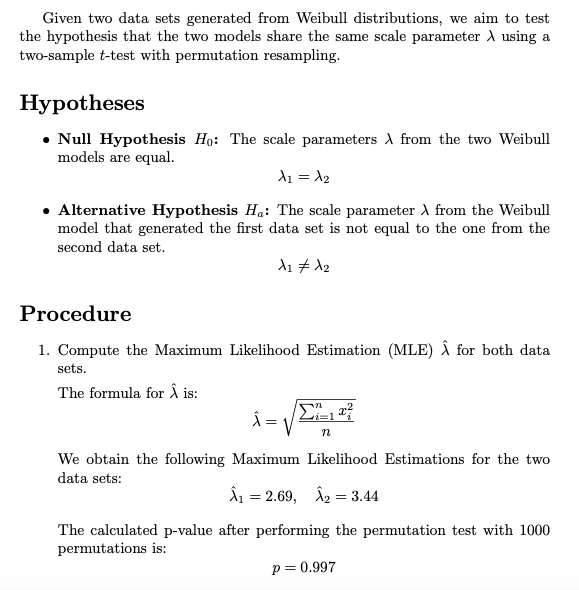

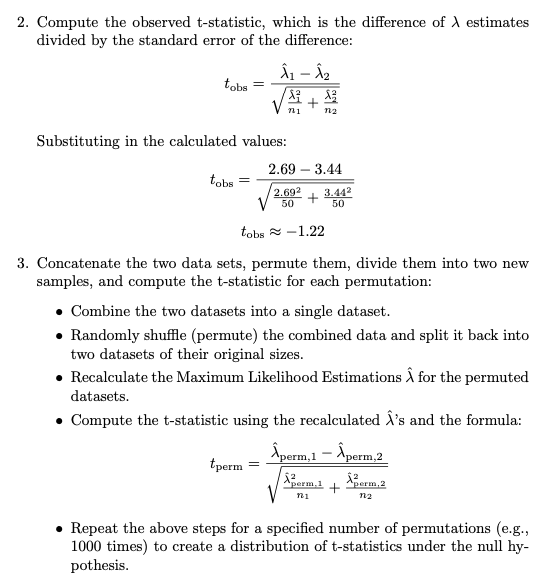

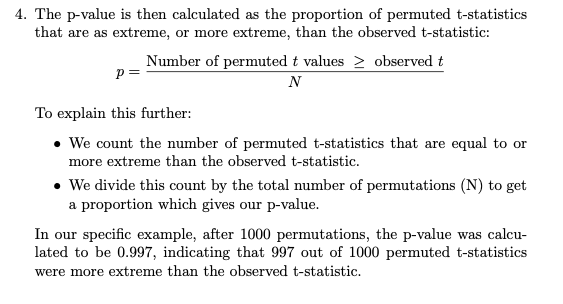

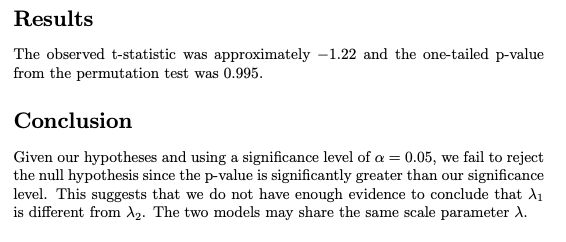